In [76]:
# Social Media Sentiment Analysis

In [77]:
## Environment Setup

In [78]:
!pip install praw

In [79]:
import praw
import pandas as pd

import os
from dotenv import load_dotenv

# Load environment variables from .env
load_dotenv()

# Set up Reddit API credentials
reddit = praw.Reddit(
    client_id = os.getenv("CLIENT_ID"),      # Replace with your Client ID
    client_secret = os.getenv("CLIENT_SECRET"),  # Replace with your Secret
    user_agent="SM-SentimentAnalysis"  # Replace with your app name
)

In [80]:
## Scraping Data

In [81]:
### Creating DataFrame

In [82]:
!pip install better-profanity

In [83]:
# Importing library to remove profanity
from better_profanity import profanity

# Selecting the sentiment analysis topic
subreddit = reddit.subreddit("MachineLearning")

# Making sure to find posts that do have content as well as skip the ones that have profanity
posts = []
for submission in subreddit.top(limit=500):
    if submission.selftext and submission.selftext.strip():
        if not (profanity.contains_profanity(submission.title) or profanity.contains_profanity(submission.selftext)):
            posts.append([
                submission.title, 
                submission.selftext,
                submission.score, 
                submission.num_comments
            ])

# Then convert the posts to a DataFrame
df = pd.DataFrame(posts, columns=["Title", "Content", "Score", "Comments"])
print(f"Filtered dataset contains {len(df)} posts.")
print(df.head())

Filtered dataset contains 188 posts.
                                               Title  \
0  [D] The machine learning community has a toxic...   
1  [D] Our community must get serious about oppos...   
2  [D] Siraj has a new paper: 'The Neural Qubit'....   
3  [P] AppleNeuralHash2ONNX: Reverse-Engineered A...   
4              [D] Does anybody else despise OpenAI?   

                                             Content  Score  Comments  
0  It is omnipresent!\n\n**First** of all, the pe...   3892       568  
1  OpenAI was founded for the explicit purpose of...   3035       451  
2  Exposed in this Twitter thread: https://twitte...   2572       451  
3  As you may already know Apple is going to impl...   1737       224  
4   I  mean, don't get me started with the closed...   1499       427  


In [84]:
### Saving Data

In [85]:
# Save the DataFrame to a CSV file
df.to_csv("reddit_ai_posts.csv", index=False)
print("Data saved to reddit_mlposts.csv")

Data saved to reddit_mlposts.csv


In [86]:
## Exploratory Data Analysis

In [87]:
### Inspecting the Data

In [88]:
# printing the first few rows
print(df.head())

# displays the df information
print(df.info())

# summary of stats such as column types and null values
print(df.describe())

                                               Title  \
0  [D] The machine learning community has a toxic...   
1  [D] Our community must get serious about oppos...   
2  [D] Siraj has a new paper: 'The Neural Qubit'....   
3  [P] AppleNeuralHash2ONNX: Reverse-Engineered A...   
4              [D] Does anybody else despise OpenAI?   

                                             Content  Score  Comments  
0  It is omnipresent!\n\n**First** of all, the pe...   3892       568  
1  OpenAI was founded for the explicit purpose of...   3035       451  
2  Exposed in this Twitter thread: https://twitte...   2572       451  
3  As you may already know Apple is going to impl...   1737       224  
4   I  mean, don't get me started with the closed...   1499       427  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     188 non-null    object
 1   Content 

In [89]:
### Preprocessing

In [90]:
# improve accuracy, remove noise, and add consistent formatting

In [91]:
import re

# Change all of the titles to lowercase
df["Cleaned_Title"] = df["Title"].str.lower()

# Remove the punctuation and special characters
df["Cleaned_Title"] = df["Cleaned_Title"].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

# Display the processed DataFrame
print(df.head())

                                               Title  \
0  [D] The machine learning community has a toxic...   
1  [D] Our community must get serious about oppos...   
2  [D] Siraj has a new paper: 'The Neural Qubit'....   
3  [P] AppleNeuralHash2ONNX: Reverse-Engineered A...   
4              [D] Does anybody else despise OpenAI?   

                                             Content  Score  Comments  \
0  It is omnipresent!\n\n**First** of all, the pe...   3892       568   
1  OpenAI was founded for the explicit purpose of...   3035       451   
2  Exposed in this Twitter thread: https://twitte...   2572       451   
3  As you may already know Apple is going to impl...   1737       224   
4   I  mean, don't get me started with the closed...   1499       427   

                                       Cleaned_Title  
0  d the machine learning community has a toxicit...  
1  d our community must get serious about opposin...  
2  d siraj has a new paper the neural qubit its p...  
3  p

In [92]:
### Visualizing Data

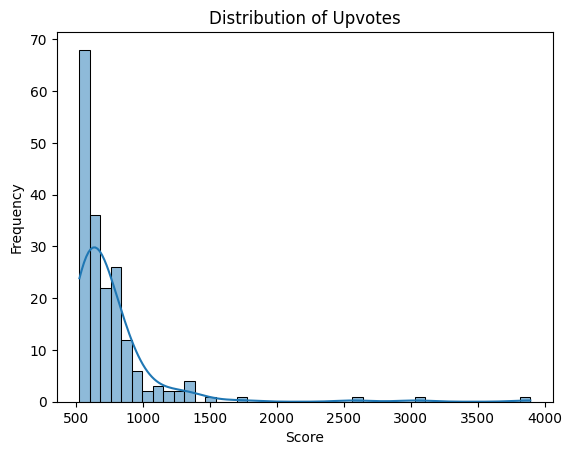

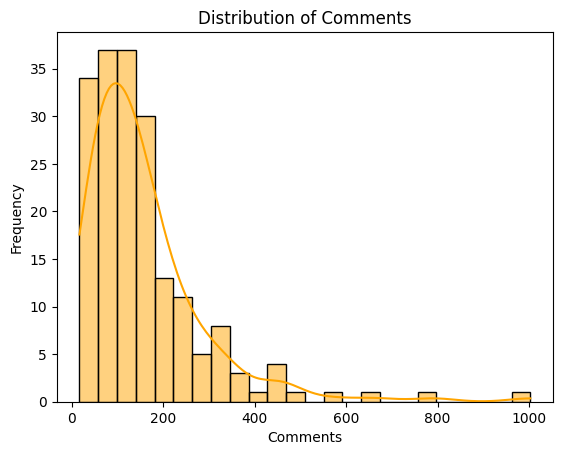

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of upvotes
sns.histplot(df["Score"], kde=True)
plt.title("Distribution of Upvotes")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

# Distribution of comments
sns.histplot(df["Comments"], kde=True, color="orange")
plt.title("Distribution of Comments")
plt.xlabel("Comments")
plt.ylabel("Frequency")
plt.show()

In [94]:
## Sentiment Analysis

In [95]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Apply sentiment analysis on titles
df["Sentiment"] = df["Title"].apply(lambda x: analyzer.polarity_scores(x)["compound"]) # overall sentiment
print(df.head(20))

                                                Title  \
0   [D] The machine learning community has a toxic...   
1   [D] Our community must get serious about oppos...   
2   [D] Siraj has a new paper: 'The Neural Qubit'....   
3   [P] AppleNeuralHash2ONNX: Reverse-Engineered A...   
4               [D] Does anybody else despise OpenAI?   
5   [D] Anyone else witnessing a panic inside NLP ...   
6   [D] Siraj Raval - Potentially exploiting stude...   
7   So long r/MachineLearning, it's been an intere...   
8                                     [R] AlphaFold 2   
9   AMA: We are the Google Brain team. We'd love t...   
10  [P] OpenAssistant - The world's largest open-s...   
11                    [D] Siraj is still plagiarizing   
12  We are Oriol Vinyals and David Silver from Dee...   
13  [N] 2024 Nobel Prize for Physics goes to ML an...   
14  [D] Chinese government uses machine learning n...   
15  [D] Why do PhD Students in the US seem like ov...   
16   [P] NumPy Illustrated. The

In [96]:
### Analysis of Sentiment Analysis

In [97]:
#### Finding Common Terms

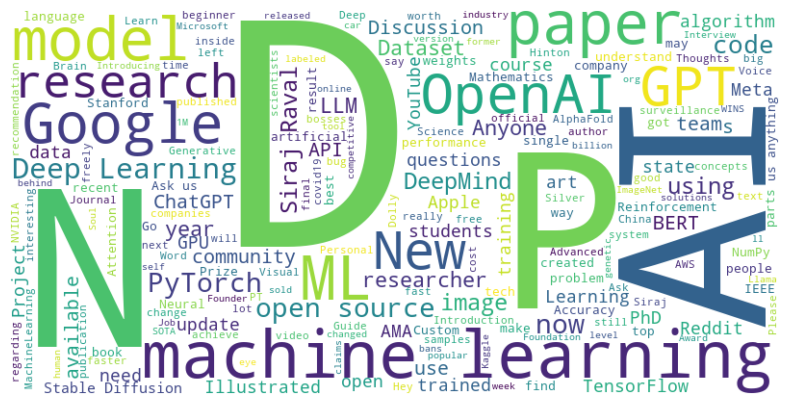

In [98]:
from wordcloud import WordCloud

# Combining all titles
text = " ".join(title for title in df["Title"])

# Generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Displaying the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [99]:
df.to_csv("processed_reddit_ai_posts.csv", index=False)
print("Processed data saved to processed_reddit_ai_posts.csv")

Processed data saved to processed_reddit_ai_posts.csv


In [100]:
#### Correlation Analysis

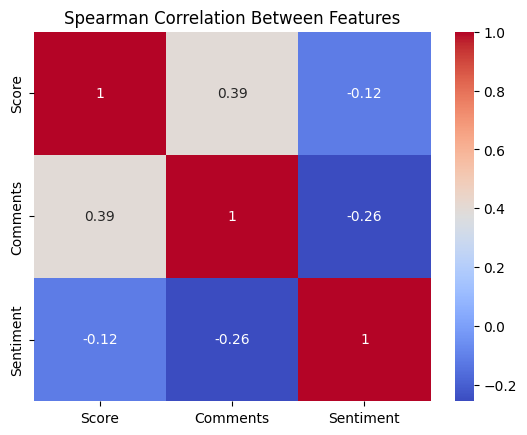

In [101]:
# Spearman correlation heatmap
correlation = df[["Score", "Comments", "Sentiment"]].corr(method="spearman")
sns.heatmap(correlation, annot=True, cmap="coolwarm")
plt.title("Spearman Correlation Between Features")
plt.show()